In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.colors
from sklearn.cluster import KMeans#引入kmeans

In [8]:
## 设置属性防止中文乱码
mpl.rcParams['font.sans-serif'] = [u'SimHei']
mpl.rcParams['axes.unicode_minus'] = False

In [14]:
#产生模拟数据
N = 2000
centers = 4
data1,label1 = make_blobs(n_samples=N,n_features=2,centers=centers,random_state = 6)
data2,label2 = make_blobs(n_samples=N,n_features=2,centers=centers,random_state=6)
#print(data1)
#vstack()把数组垂直 堆起来  hstack()则相反
data3 = np.vstack((data1[label1==1][:200], data1[label1 == 1][:100], data1[label1 == 2][:10], data1[label1 == 3][:50]))
y3 = np.array([0] * 200 + [1] * 100 + [2] * 10 + [3] * 50)
data3 = pd.DataFrame(data3)
data3.describe()

,0,1
count,360.000000,360.000000
mean,5.308985,-7.785470
std,3.102936,3.271773
min,-8.632076,-11.655005
25%,5.305244,-9.674910
50%,6.396232,-8.833553
75%,7.074632,-7.878680
max,9.186812,3.796361


In [76]:
km = KMeans(n_clusters=centers,init = 'random',random_state=6)
km.fit(data1)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=6, tol=0.0001, verbose=0)

In [77]:
print('所有样本距簇中心的距离之和：',km.inertia_)
print('所有样本距簇中心的平均距离：',km.inertia_ / N)
print('簇中心坐标：')
print(km.cluster_centers_)

所有样本距簇中心的距离之和： 3715.3755891503406
所有样本距簇中心的平均距离： 1.8576877945751702
簇中心坐标：
[[-7.76338556  1.93608257]
 [ 7.85163264 -3.37601125]
 [ 6.47670162 -9.15725419]
 [ 0.60276123 -1.62155101]]


In [78]:
def expandBorder(a, b):
    d = (b - a) * 0.1
    return a-d, b+d

In [79]:
y_pre = km.predict(data1)

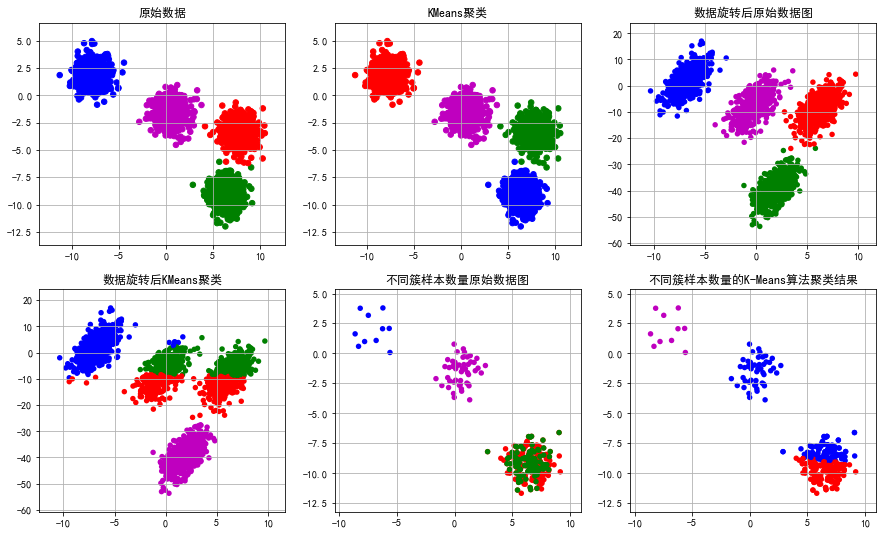

In [87]:
cm = mpl.colors.ListedColormap(list('rgbm'))#定义一个颜色列表
plt.figure(figsize=(15,9),facecolor='w')
#原始数据
plt.subplot(231)
plt.scatter(data1[:,0],data1[:,1],c= label1,s = 30,cmap = cm )
x1_min,x2_min = np.min(data1,axis = 0)
x1_max,x2_max = np.max(data1,axis = 0)
x1_min, x1_max = expandBorder(x1_min, x1_max)
x2_min, x2_max = expandBorder(x2_min, x2_max)
plt.xlim((x1_min,x1_max))
plt.ylim((x2_min,x2_max))
plt.grid(True)
plt.title('原始数据')

#km聚类
plt.subplot(232)
plt.scatter(data1[:,0],data1[:,1],c= y_pre,s = 30,cmap = cm )
plt.xlim((x1_min,x1_max))
plt.ylim((x2_min,x2_max))
plt.grid(True)
plt.title('KMeans聚类')

#旋转原始数据
m = np.array(((1,1),(0.5,5)))
data1_r = data1.dot(m)

plt.subplot(233)
plt.scatter(data1_r[:, 0], data1_r[:, 1], c=label1, s=30, cmap=cm, edgecolors='none')

x1_min, x2_min = np.min(data1_r, axis=0)
x1_max, x2_max = np.max(data1_r, axis=0)
x1_min, x1_max = expandBorder(x1_min, x1_max)
x2_min, x2_max = expandBorder(x2_min, x2_max)

plt.xlim((x1_min, x1_max))
plt.ylim((x2_min, x2_max))
plt.title(u'数据旋转后原始数据图')
plt.grid(True)

# 旋转后数据 KM聚类
y_r_pre = km.fit_predict(data1_r)
plt.subplot(234)
plt.scatter(data1_r[:, 0], data1_r[:, 1], c=y_r_pre, s=30, cmap=cm, edgecolors='none')

x1_min, x2_min = np.min(data1_r, axis=0)
x1_max, x2_max = np.max(data1_r, axis=0)
x1_min, x1_max = expandBorder(x1_min, x1_max)
x2_min, x2_max = expandBorder(x2_min, x2_max)

plt.xlim((x1_min, x1_max))
plt.ylim((x2_min, x2_max))
plt.title(u'数据旋转后KMeans聚类')
plt.grid(True)


########################################
plt.subplot(235)
plt.scatter(data3[:, 0], data3[:, 1], c=y3, s=30, cmap=cm, edgecolors='none')
x1_min, x2_min = np.min(data3, axis=0)
x1_max, x2_max = np.max(data3, axis=0)
x1_min, x1_max = expandBorder(x1_min, x1_max)
x2_min, x2_max = expandBorder(x2_min, x2_max)
plt.xlim((x1_min, x1_max))
plt.ylim((x2_min, x2_max))
plt.title(u'不同簇样本数量原始数据图')
plt.grid(True)

y3_pre = km.predict(data3)
plt.subplot(236)
plt.scatter(data3[:, 0], data3[:, 1], c=y3_pre, s=30, cmap=cm, edgecolors='none')
plt.xlim((x1_min, x1_max))
plt.ylim((x2_min, x2_max))
plt.title(u'不同簇样本数量的K-Means算法聚类结果')
plt.grid(True)
plt.show()